# Medical transcriptions

<a href='https://www.kaggle.com/datasets/tboyle10/medicaltranscriptions#mtsamples.csv'>source: kaggle.com: Medical Transcriptions</a>  
* Medical transcription data scraped from mtsamples.com

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import numpy as np

file_path = 'datasets/mtsamples.csv'
data = pd.read_csv(file_path)

data.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [123]:
specialty_counts = data.value_counts("medical_specialty")

In [124]:
specialties_to_keep = specialty_counts[specialty_counts > 100].index

In [125]:
data_filtered = data[data['medical_specialty'].isin(specialties_to_keep)]

In [126]:
data_filtered.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
7,7,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","cardiovascular / pulmonary, 2-d echocardiogram..."
9,9,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","cardiovascular / pulmonary, ejection fraction,..."
11,11,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,2-D Doppler,"2-D STUDY,1. Mild aortic stenosis, widely calc...","cardiovascular / pulmonary, 2-d study, doppler..."


In [127]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3923 entries, 3 to 4976
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3923 non-null   int64 
 1   description        3923 non-null   object
 2   medical_specialty  3923 non-null   object
 3   sample_name        3923 non-null   object
 4   transcription      3894 non-null   object
 5   keywords           3116 non-null   object
dtypes: int64(1), object(5)
memory usage: 214.5+ KB


In [128]:
distinct_values = data_filtered['medical_specialty'].unique().tolist()
value_counts = data_filtered['medical_specialty'].value_counts().tolist()

In [129]:
treemap_data = list(zip(distinct_values, value_counts))

In [130]:
df_treemap = pd.DataFrame(treemap_data, columns=['medical_specialty', 'value_count'])

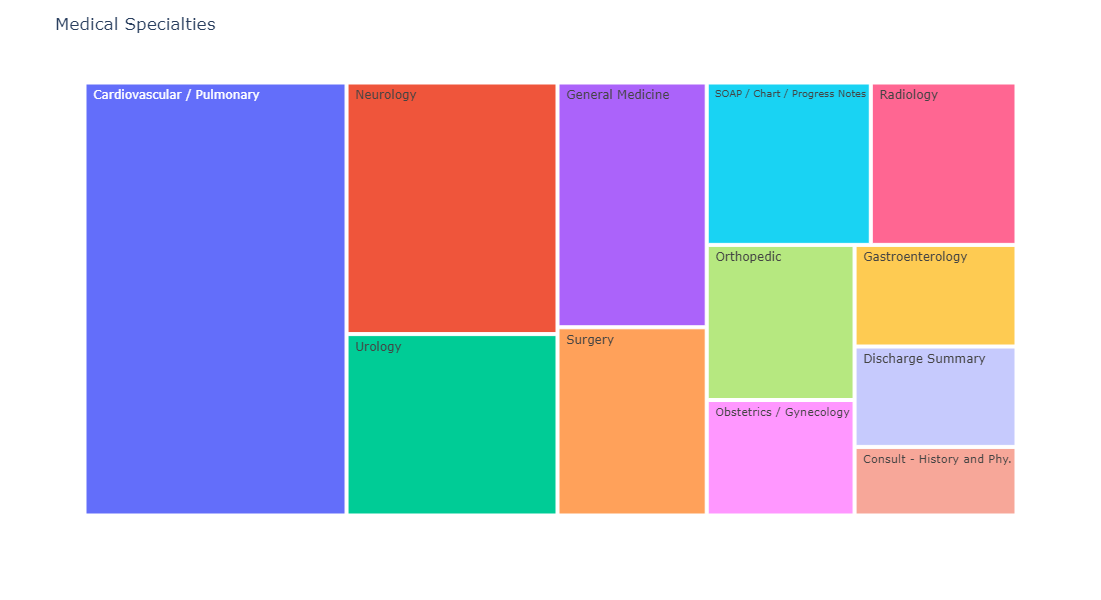

In [131]:
import plotly.express as px

fig = px.treemap(df_treemap, path= ["medical_specialty"], values="value_count")
fig.update_layout(title='Medical Specialties', width=1000, height=600)
fig.show()

## Preprocessing

In [132]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if token.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return tokens


data_filtered.loc[:, 'transcription'] = data_filtered.loc[:, 'transcription'].fillna('')

data_filtered.loc[:, 'processed_text'] = data_filtered.loc[:, 'transcription'].apply(preprocess_text)

data_filtered.head()

C:\Users\helit\AppData\Local\Temp\ipykernel_4776\2627644048.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,processed_text
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...","[left, atrial, enlargement, left, atrial, diam..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...","[left, ventricular, cavity, size, wall, thickn..."
7,7,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","cardiovascular / pulmonary, 2-d echocardiogram...","[echocardiogram, multiple, views, heart, great..."
9,9,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","cardiovascular / pulmonary, ejection fraction,...","[description, normal, cardiac, chambers, norma..."
11,11,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,2-D Doppler,"2-D STUDY,1. Mild aortic stenosis, widely calc...","cardiovascular / pulmonary, 2-d study, doppler...","[mild, aortic, stenosis, widely, calcified, mi..."


## Sentiment analysis

In [133]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

data_filtered.loc[:, 'transcription'] = data_filtered.loc[:, 'transcription'].fillna('')

# Apply the function to the 'transcription' column
data_filtered.loc[:, 'sentiment'] = data_filtered.loc[:, 'transcription'].apply(lambda x: get_sentiment(str(x)))

# Display the sentiment distribution
sentiment_distribution = data_filtered.loc[:, 'sentiment'].value_counts()
print(sentiment_distribution)

sentiment
Positive    3199
Negative     651
Neutral       73
Name: count, dtype: int64


C:\Users\helit\AppData\Local\Temp\ipykernel_4776\417281119.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [134]:
stop = set(stopwords.words('english'))
data_filtered['transcription_v2'] = data_filtered['transcription'].apply(lambda x: str(x) if isinstance(x, (str, np.generic)) else '')
data_filtered['text_no_sw'] = data_filtered['transcription'].apply(lambda x: ' '.join([word for word in word_tokenize(x.lower()) if word not in stop]))

C:\Users\helit\AppData\Local\Temp\ipykernel_4776\3947290822.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\helit\AppData\Local\Temp\ipykernel_4776\3947290822.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [135]:
from nltk.sentiment import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
data_filtered['sentiment'] = data_filtered['text_no_sw'].apply(lambda x: sid.polarity_scores(x)['compound'])

C:\Users\helit\AppData\Local\Temp\ipykernel_4776\1207614757.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



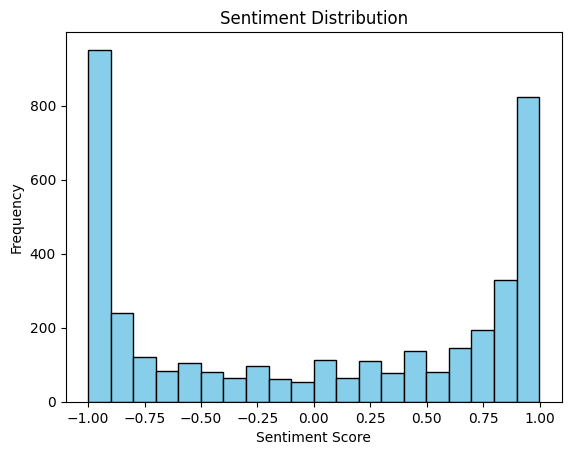

In [140]:
plt.hist(data_filtered['sentiment_v2'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()

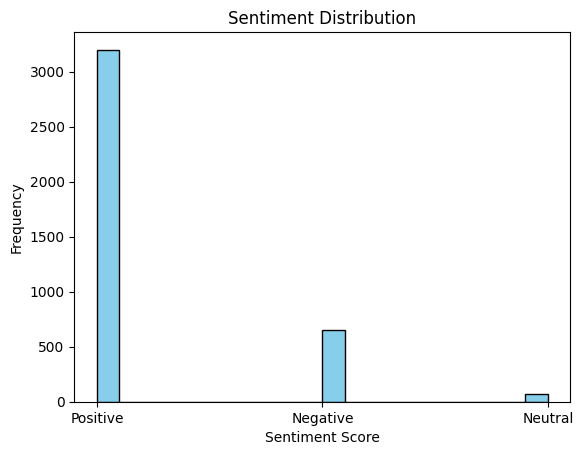

In [139]:
plt.hist(data_filtered['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()

## Topic classification

In [137]:
topics = data_filtered['medical_specialty'].unique()
topics = [topic.strip() for topic in topics]

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_filtered.loc[:, 'processed_text'].apply(lambda x: ' '.join(x)))

y = data_filtered['medical_specialty']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=1))

                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary       0.53      0.11      0.18        81
    Consult - History and Phy.       0.35      0.96      0.52       108
             Discharge Summary       1.00      0.00      0.00        15
              Gastroenterology       1.00      0.00      0.00        45
              General Medicine       1.00      0.00      0.00        48
                     Neurology       0.33      0.02      0.03        56
       Obstetrics / Gynecology       1.00      0.00      0.00        24
                    Orthopedic       0.33      0.03      0.05        68
                     Radiology       0.00      0.00      0.00        54
 SOAP / Chart / Progress Notes       1.00      0.00      0.00        27
                       Surgery       0.48      0.99      0.65       225
                       Urology       1.00      0.00      0.00        34

                      accuracy                           0.43 